In [48]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn import preprocessing
import scipy as sp
from sklearn.model_selection import train_test_split
import seaborn as sns
'''
Genarating Dataset
'''
path = "./owid-covid-data.csv"
data = pd.read_csv(path, encoding="ISO-8859–1")

icu_patients 142863
icu_patients_per_million 142863
hosp_patients 141709
hosp_patients_per_million 141709
weekly_icu_admissions 160893
weekly_icu_admissions_per_million 160893
weekly_hosp_admissions 155403
weekly_hosp_admissions_per_million 155403
new_tests 99009
total_tests 97071
total_tests_per_thousand 97071
new_tests_per_thousand 99009
positive_rate 87671
tests_per_case 88242
total_vaccinations 121132
people_vaccinated 123339
people_fully_vaccinated 126085
total_boosters 148787
new_vaccinations 128879
total_vaccinations_per_hundred 121132
people_vaccinated_per_hundred 123339
people_fully_vaccinated_per_hundred 126085
total_boosters_per_hundred 148787
new_people_vaccinated_smoothed 83238
new_people_vaccinated_smoothed_per_hundred 83238
handwashing_facilities 97757
excess_mortality_cumulative_absolute 160630
excess_mortality_cumulative 160630
excess_mortality 160630
excess_mortality_cumulative_per_million 160630


Text(0.5, 1.0, 'Columns that contian missing values over 50%')

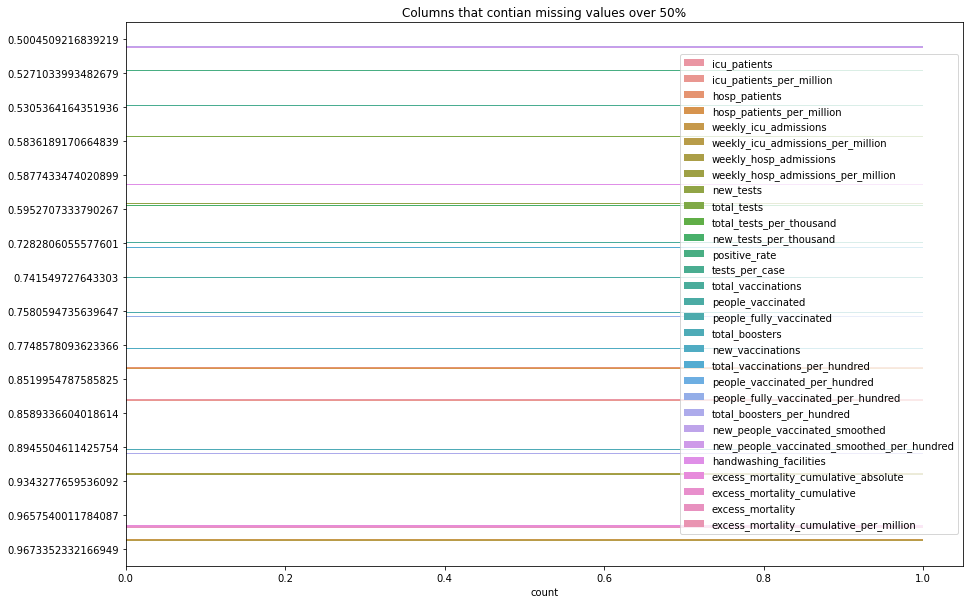

In [49]:
x, y = [], []
for col in data.columns:
    if data[col].isnull().sum()/len(data) > 0.5:
        x.append(data[col].isnull().sum()/len(data))
        y.append(col)
        print(col,data[col].isnull().sum())
        
fig = plt.figure(figsize=(15,10))        
sns.countplot(y= x, hue = y).set_title('Columns that contian missing values over 50%')
# plt.xlabel('data name') 
# plt.ylabel('percentage') 
# plt.title("Missing data >= 0.6")
# plt.show() 


In [50]:
avgVal = data['hosp_patients'].sum()/len(data['hosp_patients'])
data['hosp_patients'].replace(to_replace = np.nan, value = avgVal, inplace=True)

avgVal = data['icu_patients'].sum()/len(data['icu_patients'])
data['icu_patients'].replace(to_replace = np.nan, value = avgVal, inplace=True)
# data['weekly_icu_admissions'].replace(to_replace = np.nan, value = 0, inplace=True)
# data['weekly_hosp_admissions'].replace(to_replace = np.nan, value = 0, inplace=True)
data['number_people_hosp'] = data['hosp_patients']+data['icu_patients']
data = data.drop(['hosp_patients', 'icu_patients', 'location'], axis=1)

avgVal = data['weekly_icu_admissions'].sum()/len(data['weekly_icu_admissions'])
data['weekly_icu_admissions'].replace(to_replace = np.nan, value = avgVal, inplace=True)

avgVal = data['weekly_hosp_admissions'].sum()/len(data['weekly_hosp_admissions'])
data['weekly_hosp_admissions'].replace(to_replace = np.nan, value = avgVal, inplace=True)

data['weekly_admissions'] = data['weekly_icu_admissions']+data['weekly_hosp_admissions']
data = data.drop(['weekly_icu_admissions', 'weekly_hosp_admissions'], axis=1)
data['new_situation_per_million'] = data['new_cases_smoothed_per_million']+data['new_deaths_smoothed_per_million']

avgVal = data['positive_rate'].sum()/len(data['positive_rate'])
data['positive_rate'].replace(to_replace = np.nan, value = avgVal, inplace=True)

avgVal = data['new_people_vaccinated_smoothed'].sum()/len(data['new_people_vaccinated_smoothed'])
data['new_people_vaccinated_smoothed'].replace(to_replace = np.nan, value = avgVal, inplace=True)

avgVal = data['handwashing_facilities'].sum()/len(data['handwashing_facilities'])
data['handwashing_facilities'].replace(to_replace = np.nan, value = avgVal, inplace=True)

avgVal = data['total_tests_per_thousand'].sum()/len(data['total_tests_per_thousand'])
data['total_tests_per_thousand'].replace(to_replace = np.nan, value = avgVal, inplace=True)

avgVal = data['tests_per_case'].sum()/len(data['tests_per_case'])
data['tests_per_case'].replace(to_replace = np.nan, value = avgVal, inplace=True)

data['tests_units'].replace(to_replace = [np.nan, "units unclear"], value = [0,0], inplace=True)
data['tests_units'].replace(to_replace = ['tests performed', 'people tested', 'samples tested'], value = [1,1,1], inplace=True)


In [51]:
#remove the columns that has missing data over 50%
for col in data.columns:
    missingRate = data[col].isnull().sum()/len(data)
    if missingRate >= 0.5:
        data = data.drop([col], axis=1)

data = data.drop(["new_cases", "new_deaths", "new_cases_per_million", "new_deaths_per_million"], axis=1)       

In [52]:
data = data.dropna() #remove the rows that contain missing feature value(s).\
# for i in data.columns:
#     if data[i].dtype != object:
#         data.hist(column=i)


In [53]:
data

,iso_code,continent,date,total_cases,new_cases_smoothed,total_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,number_people_hosp,weekly_admissions,new_situation_per_million
1814,ALB,Europe,2021-01-11,63971.0,621.143,1247.0,6.857,22266.784,216.205,434.051,...,10.08,7.1,51.2,20.937984,2.89,78.57,0.795,747.927059,413.175932,218.592
1815,ALB,Europe,2021-01-12,64627.0,620.571,1252.0,6.000,22495.122,216.006,435.791,...,10.08,7.1,51.2,20.937984,2.89,78.57,0.795,747.927059,413.175932,218.094
1816,ALB,Europe,2021-01-13,65334.0,618.000,1256.0,5.571,22741.212,215.111,437.184,...,10.08,7.1,51.2,20.937984,2.89,78.57,0.795,747.927059,413.175932,217.050
1817,ALB,Europe,2021-01-14,65994.0,612.714,1261.0,5.429,22970.942,213.271,438.924,...,10.08,7.1,51.2,20.937984,2.89,78.57,0.795,747.927059,413.175932,215.161
1818,ALB,Europe,2021-01-15,66635.0,608.143,1265.0,5.000,23194.059,211.680,440.316,...,10.08,7.1,51.2,20.937984,2.89,78.57,0.795,747.927059,413.175932,213.420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166316,ZWE,Africa,2022-02-24,234967.0,338.429,5390.0,1.286,15568.801,22.424,357.139,...,1.82,1.6,30.7,36.791000,1.70,61.49,0.571,747.927059,413.175932,22.509
166317,ZWE,Africa,2022-02-25,235467.0,348.143,5392.0,1.000,15601.930,23.068,357.271,...,1.82,1.6,30.7,36.791000,1.70,61.49,0.571,747.927059,413.175932,23.134
166318,ZWE,Africa,2022-02-26,235803.0,368.429,5393.0,1.000,15624.193,24.412,357.338,...,1.82,1.6,30.7,36.791000,1.70,61.49,0.571,747.927059,413.175932,24.478
166319,ZWE,Africa,2022-02-27,235803.0,350.143,5393.0,1.000,15624.193,23.200,357.338,...,1.82,1.6,30.7,36.791000,1.70,61.49,0.571,747.927059,413.175932,23.266


28077it [00:01, 27048.40it/s]


Text(0.5, 1.0, 'Change of total deaths of ALB during 2020~2022')

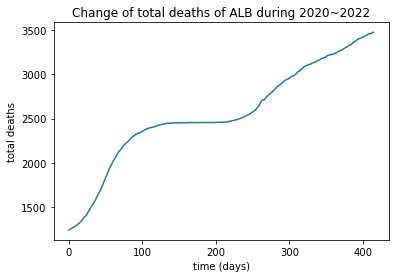

In [54]:
x, y = [],[]
for index, row in tqdm(data.iterrows()):
    if row['iso_code'] == "ALB":
        x.append(row['total_deaths'])
        
y = [i for i in range(len(x))]
plt.plot(y, x)
plt.xlabel('time (days)') 
plt.ylabel('total deaths') 
plt.title("Change of total deaths of ALB during 2020~2022")

In [55]:
data['total_deaths'].value_counts()

29.0       145
122.0      109
30.0        95
910.0       91
33.0        68
          ... 
30468.0      1
30567.0      1
30611.0      1
30647.0      1
5395.0       1
Name: total_deaths, Length: 17961, dtype: int64

In [56]:
def rerange(name):
    avgVal = data[name].sum()/len(data[name])
    for index, row in tqdm(data.iterrows()):
        if avgVal/2 >= float(row[name]) > 0:
            data.loc[index, name] = 0
        elif avgVal >= float(row[name]) > avgVal/2:
            data.loc[index, name] = 1
        elif 3*avgVal/2 >= float(row[name]) > avgVal:
            data.loc[index, name] = 2
        else:
            data.loc[index, name] = 3
            
for col in ['total_cases', 'new_cases_smoothed', 'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_smoothed_per_million', 'total_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate',
       'total_tests_per_thousand', 'new_tests_smoothed',
       'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case',
       'tests_units', 'new_vaccinations_smoothed',
       'new_vaccinations_smoothed_per_million',
       'new_people_vaccinated_smoothed', 'stringency_index', 'population',
       'population_density', 'median_age', 'aged_65_older', 'aged_70_older',
       'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate',
       'diabetes_prevalence', 'female_smokers', 'male_smokers',
       'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index', 'number_people_hosp',
       'weekly_admissions', 'new_situation_per_million']:
    rerange(col)

28077it [00:03, 8611.35it/s]
28077it [00:03, 8635.15it/s]
28077it [00:03, 8647.26it/s]
28077it [00:03, 8536.32it/s]
28077it [00:03, 8735.19it/s]
28077it [00:03, 8263.56it/s]
28077it [00:03, 8480.59it/s]
28077it [00:03, 8249.42it/s]
28077it [00:03, 8427.23it/s]
28077it [00:03, 8677.30it/s]
28077it [00:03, 8552.62it/s]
28077it [00:03, 8556.99it/s]
28077it [00:03, 8652.46it/s]
28077it [00:03, 8431.12it/s]
28077it [00:03, 8644.18it/s]
28077it [00:03, 8355.06it/s]
28077it [00:03, 8556.98it/s]
28077it [00:03, 8353.34it/s]
28077it [00:03, 8292.92it/s]
28077it [00:03, 8625.73it/s]
28077it [00:03, 8285.17it/s]
28077it [00:03, 8301.56it/s]
28077it [00:03, 8443.02it/s]
28077it [00:03, 8491.99it/s]
28077it [00:03, 8694.41it/s]
28077it [00:03, 8401.31it/s]
28077it [00:03, 8078.22it/s]
28077it [00:03, 8480.02it/s]
28077it [00:03, 8402.00it/s]
28077it [00:03, 8441.20it/s]
28077it [00:03, 8490.94it/s]
28077it [00:03, 8252.34it/s]
28077it [00:03, 8324.82it/s]
28077it [00:03, 8781.09it/s]
28077it [00:03

In [57]:
data['severity_lvl'] = 0

for index, row in tqdm(data.iterrows()):
    if float(row['total_deaths']) < 1200:
        data.loc[index, 'severity_lvl'] = 0
    elif float(row['total_deaths']) <= 2200:
        data.loc[index, 'severity_lvl'] = 1
    elif float(row['total_deaths']) <= 3200:
        data.loc[index, 'severity_lvl'] = 2
    else:
        data.loc[index, 'severity_lvl'] = 3
data = data.drop(["total_deaths"], axis=1)        

28077it [00:03, 8347.76it/s]


In [45]:
data['severity_lvl'].value_counts()

3    19848
0     4523
1     1911
2     1795
Name: severity_lvl, dtype: int64

28077it [00:01, 27108.58it/s]


Text(0.5, 1.0, 'Change of severity level of ALB during 2020~2022')

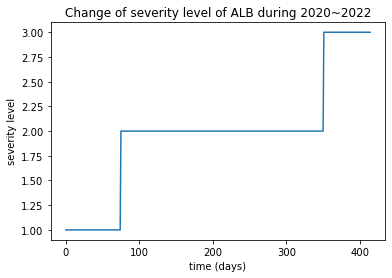

In [47]:
x, y = [],[]
for index, row in tqdm(data.iterrows()):
    if row['iso_code'] == "ALB":
        x.append(row['severity_lvl'])
        
y = [i for i in range(len(x))]
plt.plot(y, x)
plt.xlabel('time (days)') 
plt.ylabel('severity level') 
plt.title("Change of severity level of ALB during 2020~2022")

<AxesSubplot:xlabel='count', ylabel='stringency_index'>

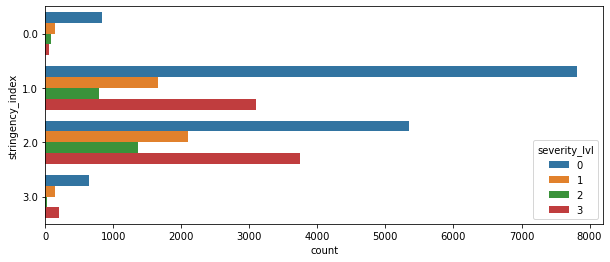

In [295]:
fig = plt.figure(figsize=(10,4))
sns.countplot(y= data['stringency_index'], hue = data['severity_lvl'])

In [58]:
data = pd.get_dummies(data, columns=['iso_code', 'continent'], drop_first = True)

In [59]:
data['date'] = pd.to_datetime(data['date'], 
 format = '%Y-%m-%d', 
 errors = 'coerce')

data['date_year']  = data['date'].dt.year
data['date_month']  = data['date'].dt.month
data['date_day']  = data['date'].dt.day

data = data.drop(["date"], axis=1)    

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
features = list(set(list(data.columns))- {'severity_lvl'})
X = data[features]
y = data['severity_lvl']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [71]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10)
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(dtree_pred, name = 'Predict'), margins = True)

print("Accuracy is {0:.6f}".format(accuracy_score(y_test, dtree_pred)))
# print("Precision is {0:.2f}".format(precision_score(y_test, dtree_pred)))
# print("Recall is {0:.2f}".format(recall_score(y_test, dtree_pred)))

Accuracy is 0.993590


In [64]:
dtree_pred[:100]

array([3, 0, 1, 0, 3, 3, 0, 1, 1, 3, 3, 0, 3, 3, 0, 0, 1, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 1, 3, 3, 3, 3, 3, 1,
       3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 3, 0, 3, 3, 3, 3, 3, 2, 0, 3, 1,
       1, 3, 3, 3, 0, 3, 1, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 3, 0, 0, 3, 0, 3, 3, 3, 3])

In [66]:
'''
Using Log Transform to remove Skewness.
'''
features = ['total_cases', 'new_cases_smoothed', 'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_smoothed_per_million', 'total_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate',
       'total_tests_per_thousand', 'new_tests_smoothed',
       'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case',
       'tests_units', 'new_vaccinations_smoothed',
       'new_vaccinations_smoothed_per_million',
       'new_people_vaccinated_smoothed', 'stringency_index', 'population',
       'population_density', 'aged_65_older', 'aged_70_older',
       'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate',
       'diabetes_prevalence', 'female_smokers', 'male_smokers',
       'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index', 'number_people_hosp',
       'weekly_admissions', 'new_situation_per_million']
for i in features:
    skewval = data[i].skew()
    kurtval = data[i].kurtosis()    
    if (abs(skewval) > 1) or (abs(kurtval) > 1):
        if len(data[data[i] == 0])/len(data) <= 0.02:
            data[i] = np.log(data[i])
        else:
            data[i] = np.log1p(data[i])

In [67]:
from sklearn import preprocessing
indexName = list(set(list(data._get_numeric_data().columns))- {'severity_lvl'})
for col in indexName:
    try:
        data[col] = preprocessing.StandardScaler().fit_transform(data[[col]].values)
    except:
        print(col)

In [68]:
data['median_age'].value_counts()

 0.974808    14080
-0.933019    13648
-2.840845      349
Name: median_age, dtype: int64